<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 4: Classification and Logistic Regression

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Announcements

* Homework 1 is out and due a week from now
* Please have a look at our online lecture notes and videos.

# Part 1: Classification

So far, every supervised learning algorithm that we've seen has been an instance of regression.

We will next look at classification. First, let's define what classification is.

# Review: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Review: Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depending on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.

2. __Classification__: The target variable $y$ is discrete and takes one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification

An important special case of classification is when the number of classes $K=2$.

In this case, we have an instance of a *binary classification* problem.

# An Example: Classifying Iris Flowers

Our running example for classification problems will be the __iris flower dataset__. 

This is a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. 
<!-- Nowadays, it's often used for demonstrating machine learning algorithms. -->

Let's import the dataset from `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Below, we print out five random rows of this dataset.

In [3]:
# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
129,7.2,3.0,5.8,1.6,2
79,5.7,2.6,3.5,1.0,1
47,4.6,3.2,1.4,0.2,0
19,5.1,3.8,1.5,0.3,0
109,7.2,3.6,6.1,2.5,2


# Understanding Classification

How is clasification different from regression?
* In regression, our goal is to fit a curve through the output space that passes close to the set of targets $y^{(i)}$.

* In classification, classes are associated with regions of the feature space, and our goal is to find the boundaries between these regions.

* Outputs of classification models often have a simple probabilistic interpretation: they are probabilities that a data point belongs to a given class.

Let's look at an example on the Iris dataset. We visualize this dataset using the first 2 attributes using `matplotlib`.

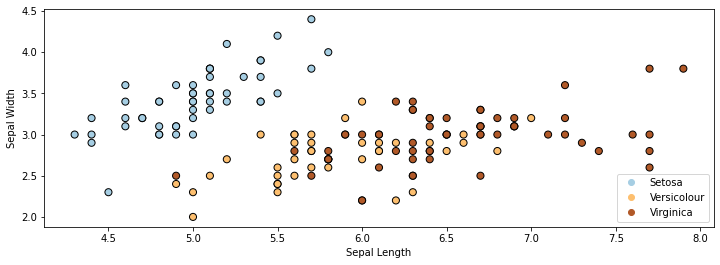

In [5]:
import matplotlib.pyplot as plt # Code from: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
plt.rcParams['figure.figsize'] = [12, 4]
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=50, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

Let's train a classification algorithm called __logistic regression__.

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
X, Y = iris_X.to_numpy()[:,:2], iris_y.copy()
logreg.fit(X, Y) 

LogisticRegression(C=100000.0)

Note: logistic regression actually a __classification__ algorithm.

The regions below are predicted to be associated with the blue, brown, and yellow classes. The lines between them are the decision boundaries.

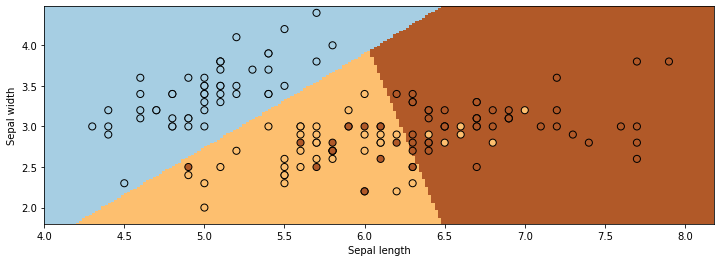

In [7]:
xx, yy = np.meshgrid(np.arange(4, 8.2, .02), np.arange(1.8, 4.5, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 2: Logistic Regression

We are now going to define our first classification algorithm: logistic regression.

# Binary Classification 

We will to start by looking at __binary__ (two-class) classification. 

To keep things simple, we will use the Iris dataset. We will attempt to distinguish class 0 (Iris Setosa) from the other two classes.

We only use the first two features in the dataset. Our task is to tell apart Setosa flowers from non-Setosa flowers.

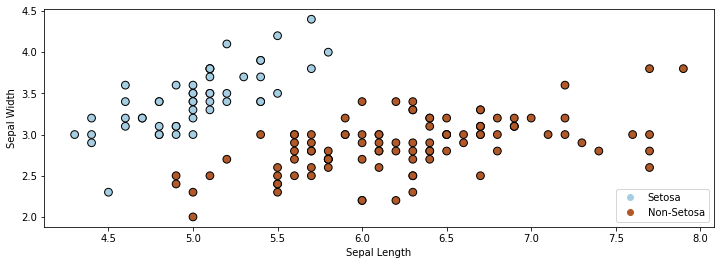

In [9]:
# rename class two to class one
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1

# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y2,
            edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Non-Setosa'], loc='lower right')

# Review: Ordinary Least Squares

Recall that in ordinary least squares, we fit a linear model of the form
$$ f(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

It minimizes the mean squared error (MSE)
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
on a dataset $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We could use least squares to solve our classification problem, setting $\mathcal{Y} = \{0, 1\}$.

In [16]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X, Y = iris_X.to_numpy()[:,:2], iris_y2
linreg.fit(X, Y)

LinearRegression()

Ordinary least squares returns a decision boundary that is not unreasonable.

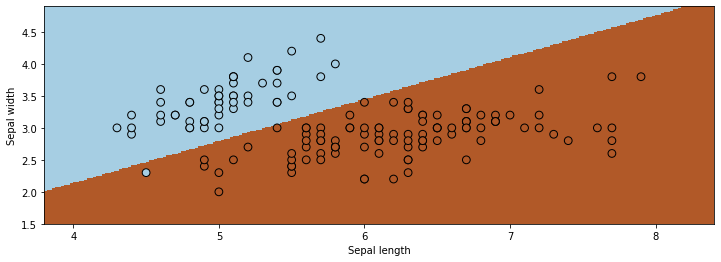

In [17]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = linreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z[Z>0.5] = 1
Z[Z<0.5] = 0

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=60)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

However, applying OLS is problematic for a few reasons.
* __Unbounded outputs__: There is nothing to prevent outputs larger than one or smaller than zero, which is conceptually wrong

* __Performance issues:__ At least one point is misclassified, and others are too close to the decision boundary.

# Logistic Regression: The Model

Logistic regression is a classification algorithm where $f_\theta$ has the form
$$ f_\theta(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}. $$

This is a composition of a linear model $\theta^\top x$ with 
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is the *sigmoid* or *logistic* function.

Note that logistic regression is actually a binary __classification__ algorithm.

The term *regression* is an unfortunate historical misnomer.

# The Logistic Function

To address the fact that the output of linear regression is not in $[0,1]$, we will *squeeze* it into that range using
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
This is known as the *sigmoid* or *logistic* function.

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" points from the real line into $[0,1]$.

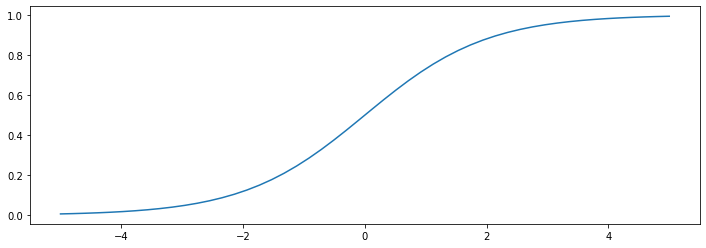

In [11]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-5, 5)
plt.plot(z, sigmoid(z))

# The Logistic Function: Properties

The sigmoid function is defined as
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
A few observations:

* The function tends to 1 as $z \to \infty$ and tends to 0 as $z \to -\infty$.

* Thus, models of the form $\sigma(\theta^\top x)$ output values between 0 and 1, which is suitable for binary classification.

* It is easy to show that the derivative of $\sigma(z)$ has a simple form:
$\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z)).$

# Probabilistic Interpretations

The logistic model can be interpreted to output a probability, and defines a conditional probability distribution as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

Recall that a probability over $y\in \{0,1\}$ is called Bernoulli.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Maximum Likelihood

In order to train a logistic regression model, we need to define an objective.

We derive this objective using the principle of maximum likelihood.

# Recall: Supervised Learning Models

A model is a function $f_\theta$ that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

\begin{align}
\\
\textbf{Model Type} & & \textbf{How To Use} & & \textbf{Example} \\
f_\theta : \underbrace{\mathcal{X}}_\text{input} \to \underbrace{\mathcal{Y}}_\text{output} & & y_\text{pred} = f_\theta(x) & & y_\text{pred} = \theta^\top x \\
\\
\end{align}



# Probabilistic Supervised Learning Models

A probabilistic model parameterizes a *probability* over $y_\text{pred}$ given $x$.

\begin{align}
P_\theta(y= y_\text{pred} | x)
\end{align}

Given $x \in \mathcal{X}$, the model outputs a *conditional probability* $P(y|x)$
over targets $y \in \mathcal{Y}$.


For example, our logistic regression model $f_\theta$ defines ("parameterizes") a probability distribution $P_\theta(y|x)$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

For each $x$, $P_\theta(y|x)$ is a valid probability over $y \in \{0,1\}$.

This is a more general recipe for a probabilistic model:
* Given an $x$, we have __a formula for $P_\theta(y|x)$__ as a function of $x$ and $\theta$.
* The formula assigns higher probabilities ("__scores__") to more likely $y$.
* These __scores sum to 1__ over all $y$, hence they're valid probabilities.

We usually use the following notation to denote probabilistic models:

\begin{align*}
P_\theta(y|x) : \mathcal{X} \to \underbrace{(\mathcal{Y} \to [0,1])}_\text{probability $P(y|x)$ over $\mathcal{Y}$}.
\end{align*}

# Why Probabilistic Models?

There are two reasons why we will be interested in probabilistic models.

* __Confidence Estimation__: Oftentimes, we want to know if the model is certain in its prediction.
* __Learning Objective__: Probabilistic models can be used to define a principled learning objective.

# Conditional Maximum Likelihood

We can train any model that defines a probability distribution $P_\theta(y|x)$ by optimizing
the *conditional maximum likelihood* objective
$$
\max_\theta \ell(\theta) = \max_{\theta} \frac{1}{n}\sum_{i=1}^n \log P_\theta(y^{(i)} | {x}^{(i)}).
$$
defined over a dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We want to choose the weights such that the true label $y^{(i)}$ has the highest possible probability under $P_\theta(y|x^{(i)})$ for each $x^{(i)}$.

Recall our earlier example with logistic regression.

\begin{align*}
P_\theta(y=1 | x)  = \sigma(\theta^\top x) &&
P_\theta(y=0 | x)  = 1-\sigma(\theta^\top x).
\end{align*}

Maximuzing log-likelihood asks the model $f_\theta(x) = \sigma(\theta^\top x)$: 
* To output values close to one when the true label is one 
* And close to zero when the true label is zero

# Example: Flipping a Random Coin

$
\newcommand{\cm}{\mathcal{M}}
$
Consider a simple example in which we repeatedly toss a biased coin and record the outcomes.

* There are two possible outcomes: heads ($H$) and tails ($T$). A training dataset consists of tosses of the biased coin, e.g., $\mathcal{D}=\{H,H,T,H,T\}$ 

* Assumption: true probability distribution is $P_{\textrm{data}}(y)$, $y \in \{H,T\}$ 

* Our task is to determine the probability $\theta$ of seeing heads. 

# Example: Flipping a Random Coin

How should we choose $\theta$ if 3 out of 5 tosses are heads? Let's apply maximum likelihood learning.

* Our dataset is $\mathcal{D}=\{y^{(1)},y^{(2)},y^{(3)},y^{(4)},y^{(5)}\}=\{H,H,T,H,T\}$ 

* Our model is $P_\theta(y)=\theta$ if $y=H$ and $P_\theta(y)=1-\theta$ if $y=T$, and there is a single parameter $\theta \in [0,1]$

* The likelihood of the data is $L(\theta) = \prod_{i=1}^n P_\theta(y^{(i)})=\theta \cdot \theta \cdot (1-\theta) \cdot \theta \cdot (1-\theta)$.

We optimize for $\theta$ which makes $\mathcal{D}$ most likely. What is the solution?

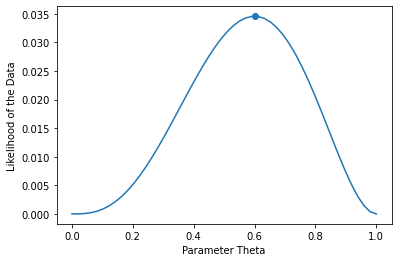

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# our dataset is {H, H, T, H, T}; if theta = P(x=H), we get:
coin_likelihood = lambda theta: theta*theta*(1-theta)*theta*(1-theta)

theta_vals = np.linspace(0,1)
plt.ylabel('Likelihood of the Data')
plt.xlabel('Parameter Theta')
plt.scatter([0.6], [coin_likelihood(0.6)])
plt.plot(theta_vals, coin_likelihood(theta_vals))

The likelihood $L(\theta)$ is maximized by $\theta=0.6$, which is also what we expect intuitively since 3/5 tosses are heads.

# Example: Flipping a Random Coin

Our log-likelihood function is
\begin{eqnarray}
\nonumber
L(\theta) &=& \theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}\\
\nonumber
\log L(\theta) &=& \log(\theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}) \\
\nonumber
&=& \#\,\text{heads} \cdot \log(\theta) + \#\,\text{tails} \cdot \log(1-\theta)
\end{eqnarray}
The maximum likelihood estimate is the $\theta^* \in [0,1]$ such that $\log L(\theta^*)$ is maximized.

Differentiating the log-likelihood function with respect to $\theta$ and setting the derivative to zero, we obtain
$$\theta^*= \frac{\#\,\text{heads}}{\#\,\text{heads}+\#\,\text{tails}}$$

When exact solutions are not available, we can optimize the log likelihood numerically, e.g. using gradient descent.

We will see examples of this later.

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 4: Learning in Logistic Regression

Next, we will use maximum likelihood to learn the parameters of a logistic regression model.

# Logistic Regression

Recall that a logistic model defines ("parameterizes") a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

When $y \in \{0,1\}$, can write this more compactly as
\begin{align*}
P_\theta(y | x) = \sigma(\theta^\top x)^y \cdot (1-\sigma(\theta^\top x))^{1-y}
\end{align*}

Let's implement a logistic regression model in `numpy`.

In [12]:
def f(X, theta):
    """The sigmoid model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return sigmoid(X.dot(theta))

# Applying Maximum Lilkelihood

Following the principle of maximum likelihood, we want to optimize the following objective defined over a binary classification dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

\begin{align*}
\ell(\theta) & = \frac{1}{n}\sum_{i=1}^n \log P_\theta (y^{(i)} \mid x^{(i)}) \\
& = \frac{1}{n}\sum_{i=1}^n \log \sigma(\theta^\top x^{(i)})^{y^{(i)}} \cdot (1-\sigma(\theta^\top x^{(i)}))^{1-y^{(i)}} \\
& = \frac{1}{n}\sum_{i=1}^n {y^{(i)}} \cdot \log \sigma(\theta^\top x^{(i)}) + (1-y^{(i)}) \cdot \log (1-\sigma(\theta^\top x^{(i)})).
\end{align*}

This objective is also often called the log-loss, or cross-entropy.

Observe that this objective asks the model to:
* Output a large score $\sigma(\theta^\top x^{(i)})$ (a score close to one) if $y^{(i)}=1$
* Output a score that's small (close to zero) if $y^{(i)}=0$.

\begin{align*}
\ell(\theta)
& = \frac{1}{n}\sum_{i=1}^n {y^{(i)}} \cdot \log \sigma(\theta^\top x^{(i)}) + (1-y^{(i)}) \cdot \log (1-\sigma(\theta^\top x^{(i)})).
\end{align*}

Let's implement the log-likelihood objective.

In [13]:
def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    We added the 1e-6 term in order to avoid overflow (inf and -inf).
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

# Review: Gradient Descent
If we want to minimize an objective $J(\theta)$, we may start with an initial guess $\theta_0$ for the parameters and repeat the following update:

$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

# Gradient of the Log-Likelihood

We want to use gradient descent to maximize the log-likelihood, hence our objective is
$J(\theta) = - \ell(\theta).$

We can show that the gradient of the negative log-likelihood equals:
\begin{align*}
\nabla_\theta J (\theta) =  \nabla_\theta \left[-\ell (\theta) \right]= 
\left( \sigma(\theta^\top x) - y \right) \cdot \bf{x}.
\end{align*}

Interestingly, this expression looks similar to the gradient of the mean squared error, which we derived in the previous lecture.

Let's implement the gradient.

In [14]:
def loglik_gradient(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta)-y) * X.T, axis=1)

Let's now implement gradient descent.

In [15]:
threshold = 5e-5
step_size = 1e-1

theta, theta_prev = np.zeros((3,)), np.ones((3,))
opt_pts = [theta]
opt_grads = []
iter = 0
iris_X['one'] = 1
X_train = iris_X.iloc[:,[0,1,-1]].to_numpy()
y_train = iris_y2.to_numpy()

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 50000 == 0:
        print('Iteration %d. Log-likelihood: %.6f' % (iter, log_likelihood(theta, X_train, y_train)))
    theta_prev = theta
    gradient = loglik_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. Log-likelihood: -0.693145
Iteration 50000. Log-likelihood: -0.021506
Iteration 100000. Log-likelihood: -0.015329
Iteration 150000. Log-likelihood: -0.012062
Iteration 200000. Log-likelihood: -0.010076


Let's now visualize the result.

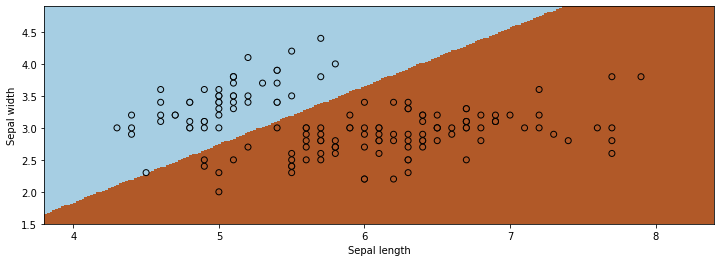

In [16]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = f(np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)], theta)
Z[Z<0.5] = 0
Z[Z>=0.5] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

This is how we would use the algorithm via `sklearn`.

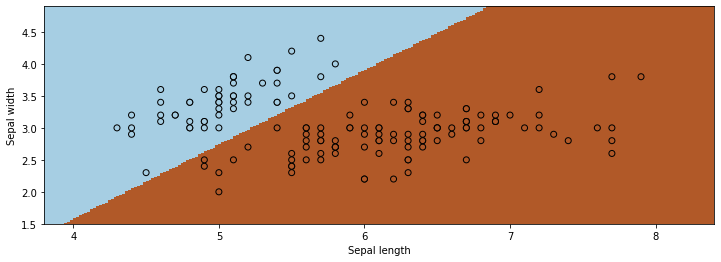

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, fit_intercept=True)

# Create an instance of Logistic Regression Classifier and fit the data.
X = iris_X.to_numpy()[:,:2]
Y = iris_y2
logreg.fit(X, Y)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Observations About Logistic Regression

Logistic regression finds a linear decision boundary.

This is the set of points for which $P(y=1|x)=P(y=0|x)$. 

Equivalently:
\begin{align*}
0 = \log\frac{P(y=1|x)}{P(y=0|x)}
= \log \frac{\frac{1}{1+\exp(-\theta^\top x)}}{1-\frac{1}{1+\exp(-\theta^\top x)}}
= \theta^\top x
\end{align*}
The set of $x$ for which $0=\theta^\top x$ is a linear surface.

Unlike least squares, we don't have a closed form solution (a formula) for the optimal $\theta$. 

We can nonetheless find it numerically via gradient descent.

# Algorithm: Logistic Regression

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Cross-entropy, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized Bernoulli distribution.

<left><img width=25% src="img/cornell_tech2.svg"></left>


# Part 5: Multi-Class Classification

Finally, let's look at an extension of logistic regression to an arbitrary number of classes.

# Multi-Class Classification

Logistic regression only applies to binary classification problems. What if we have an arbitrary number of classes $K$?

* The simplest approach that can be used with any machine learning algorithm is the "one vs. all" approach. We train one classifier for each class to distinguish that class from all the others. 

* This works, but is not very elegant. 
<!-- It doesn't output correct class probabilities. -->

* Alternatively, we may fit a probabilistic model that outputs multi-class probabilities.

Let's load a fully multiclass version of the Iris dataset.

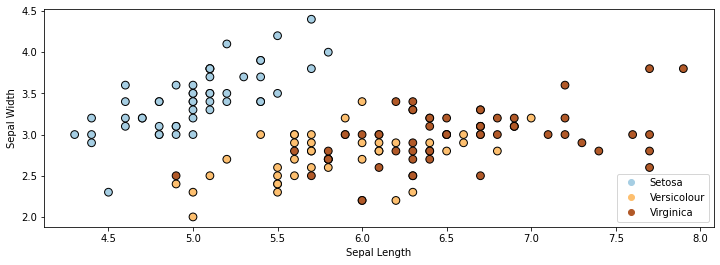

In [18]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y,
            edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

# The Softmax Function

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" the score $z\in\mathbb{R}$ of a class into a probability in $[0,1]$.

The *softmax* function $\vec \sigma : \mathbb{R}^K \to [0,1]^K$ is a multi-class version of $\sigma$ 
* It takes in a $K$-dimensional *vector* of class scores $\vec z\in\mathbb{R}$ 
* It "squeezes" $\vec z$ into a length $K$ *vector* of  probabilities in $[0,1]^K$

The $k$-th component of the output of the softmax function $\vec \sigma$ is defined as
$$ \sigma(\vec z)_k = \frac{\exp(z_k)}{\sum_{l=1}^K \exp(z_l)}. $$

Softmax takes a vector of scores $\vec z$, exponentiates each score $z_k$, and normalizes the exponentiated scores such that they sum to one.

When $K=2$, this looks as follows:
$$ \sigma(\vec z)_1 = \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)}. $$

Observe that adding a constant $c \in \mathbb{R}$ to each score $z_k$ doesn't change the output of softmax, e.g.:
$$ \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)} = \frac{\exp(z_1+c)}{\exp(z_1+c) + \exp(z_2+c)}. $$

Without loss of generality, we can assume $z_1=0$. For any $\vec z = (z_1, z_2)$, we can define $\vec z' = (0, z_2') = (0, z_2-z_1)$ such that $\vec\sigma(\vec z) = \vec\sigma(\vec z')$. Assuming $z_1=0$ doesn't change the probabilities that $\vec\sigma$ can output.

Assuming that $z_1 =0$ means that $\exp(z_1) = 1$ and softmax becomes
$$ \sigma(\vec z)_1 = \frac{1}{1 + \exp(z_2)}. $$
This is effectively our sigmoid function. Hence softmax generalizes the sigmoid function.

# Recall: Logistic Regression

Logistic regression is a classification algorithm which uses a model $f_\theta$ of the form
$$ f_\theta(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where 
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is the *sigmoid* or *logistic* function. It trains this model using maximum likelihood.

# Softmax Regression: Model Class

Softmax regression is a multi-class classification algorithm which uses a model $f_\theta : \mathcal{X} \to [0,1]^K$ that generalizes logistic regression.

Softmax regression works as follows:
1. Given an input $x$, we compute $K$ scores, one per class. The score 
$$z_k = \theta_k^\top x$$
of class $k$ is a linear function of $x$ and parameters $\theta_k$ for class $k$

2. We "squeeze" the vector of scores $\vec z$ into $[0,1]^K$ using the softmax function $\vec\sigma$ and we output $\vec\sigma(\vec z)$, a vector of $K$ probabilities.

The parameters of this model are $\theta = (\theta_1, \theta_2, ..., \theta_K)$, and the parameter space is $\Theta = \mathbb{R}^{K \times d}$.

The output of the model is a *vector* of class membership probabilities, whose $k$-th component $f_\theta(x)_k$ is
$$ f_\theta(x)_k = \sigma(\theta_k^\top x)_k = \frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}, $$
where each $\theta_l \in \mathbb{R}^d$  is the vector of parameters for class $\ell$ and $\theta = (\theta_1, \theta_2, ..., \theta_K)$.

This model is again over-parametrized: adding a constant $c \in \mathbb{R}$ to every score $\theta_k^\top x$ does not change the output of the model.

As before, we can assume without loss of generality that $z_1=0$ (or equivalently that $\theta_1=0$). This doesn't change the set of functions $\mathcal{X} \to [0,1]^K$ that our model class can represent.

Note again that softmax regression is actually a __classification__ algorithm.

The term *regression* is an unfortunate historical misnomer.

# Softmax Regression: Probabilistic Interpretation

The softmax model outputs a vector of probabilities, and defines a conditional probability distribution as follows:

\begin{align*}
P_\theta(y=k | x) & = \vec\sigma(\vec z)_k =\frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}.
\end{align*}

Recall that a probability over $y\in \{1,2,...,K\}$ is called Categorical.

# Softmax Regression: Learning Objective

We again maximize likelihood over a dataset  $\mathcal{D}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n P_\theta (y^{(i)} \mid x^{(i)}) = \prod_{i=1}^n \vec \sigma(\vec z^{(i)})_{y^{(i)}} \\
& = \prod_{i=1}^n \left( \frac{\exp(\theta_{y^{(i)}}^\top x^{(i)})}{\sum_{l=1}^K \exp(\theta_l^\top x^{(i)})} \right). \\
\end{align*}

We optimize this using gradient descent.

Let's now apply softmax regression to the Iris dataset by using the implementation from `sklearn`.

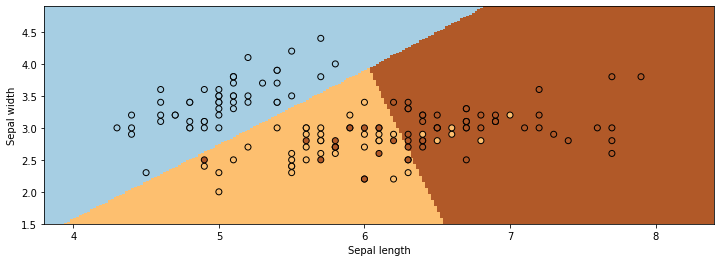

In [19]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, multi_class='multinomial')

# Create an instance of Softmax and fit the data.
logreg.fit(X, iris_y)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# Algorithm: Softmax Regression

* __Type__: Supervised learning (multi-class classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Softmax loss, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized categorical distribution.

# Conclusion and Key Ideas

In summary, the key takeaways are:

* We can define classification models by taking a regression model and mapping its output into $[0,1]$ (e.g., via sigmoid or softmax).
* ML models usually have probabilistic interpretations as $P_\theta(y|x)$.
* Any probabilistic model can be trained using maximum likelihood $\max_\theta \sum_{i=1}^n P_\theta(y^{(i)}|x^{(i)})$.